## **Hypothesis**



**Hypothesis:** Sentiment polarity, derived from patient review narratives, can meaningfully predict perceived drug effectiveness. Specifically, positive sentiments will correlate with higher effectiveness ratings, while negative sentiments will align with lower ratings and more severe side effects

**Problem Statement:** - Sentiment Analysis
- Online drug reviews contain rich, unstructured textual data that can be used to accurately predict patient sentiment through NLP techniques.
- Develop a sentiment analysis model using Natural Language Processing (NLP) techniques that can accurately classify the sentiment (positive, neutral, or negative) expressed in patient reviews of drugs based on their experiences



**Problem Statement:** - Drug Effectiveness Prediction
- Predict Drug Effectiveness (Target)
- Using: Reviews (Text), Drug Name, Condition, Ratings, Side Effects, etc

## **Exploratory Data Analysis (EDA)** 

**Load Drug dataset** 

In [57]:
import pandas as pd

# Read the TSV file
df1 = pd.read_csv('/Users/mac/Documents/UNIVERSITY/Drug_review_Project/AAI_501_Project/eda/drugLibTest_raw.tsv', sep='\t')

df2 = pd.read_csv('/Users/mac/Documents/UNIVERSITY/Drug_review_Project/AAI_501_Project/eda/drugLibTest_raw.tsv', sep='\t')

# Combine train and test data for complete analysis
df_combined = pd.concat([df1, df2], ignore_index=True)

df_combined = df_combined.reset_index().rename(columns={'index':'id'})

# Display the first few rows
df_combined.head()

,id,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


**Analysis of ratings**

<Axes: title={'center': 'count of ratings'}, xlabel='rating'>

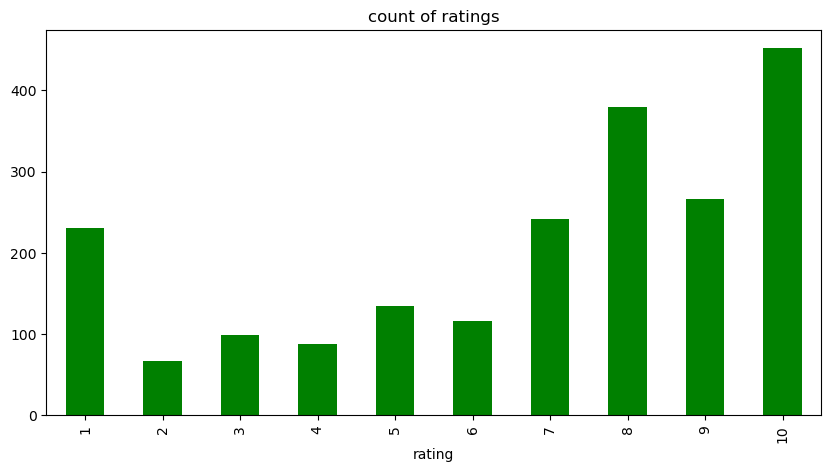

In [58]:
df_combined['rating'].value_counts().sort_index().plot(kind='bar', color='green', title='count of ratings', figsize=(10,5))

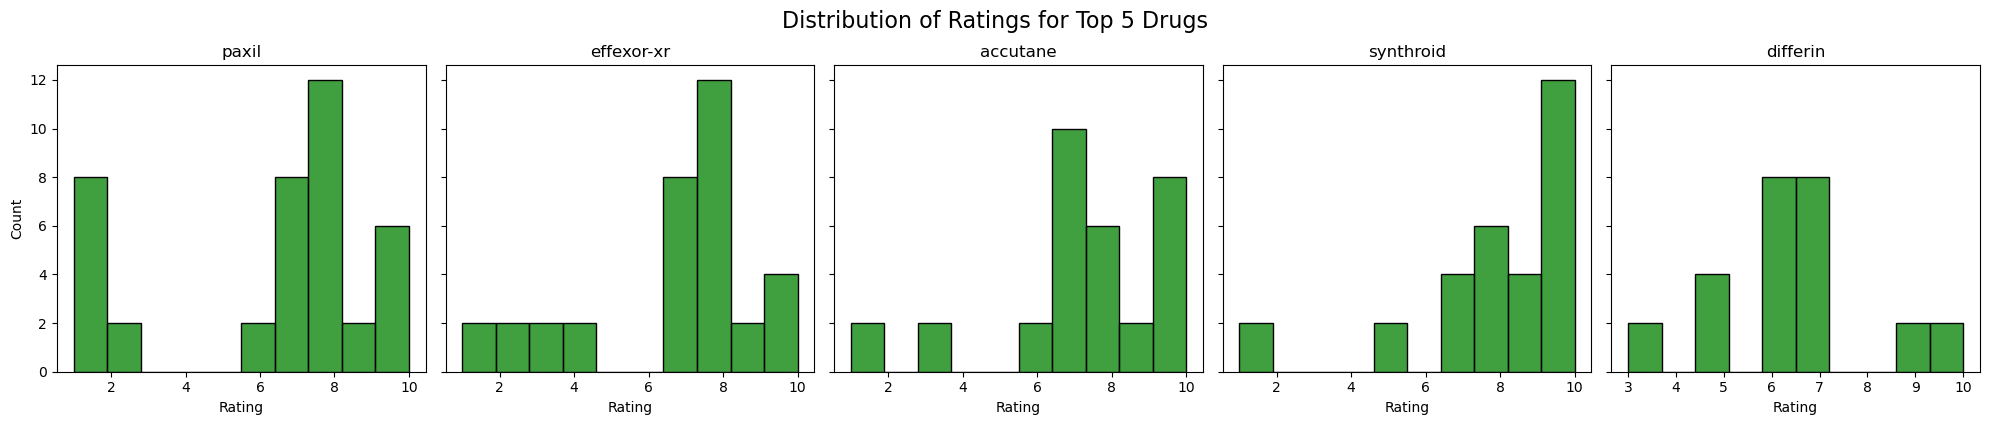

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select 5 drugs 
top_drugs = df_combined['urlDrugName'].value_counts().head(5).index.tolist()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4), sharey=True)

# Loop through each drug and corresponding subplot
for i, drug in enumerate(top_drugs):
    ax = axes[i]
    sns.histplot(data=df_combined[df_combined['urlDrugName'] == drug],
                 x='rating', bins=10, color='green', ax=ax)
    ax.set_title(drug)
    ax.set_xlabel('Rating')
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.set_ylabel('')

plt.tight_layout()
plt.suptitle('Distribution of Ratings for Top 5 Drugs', fontsize=16, y=1.05)
plt.show()


In general, the bar charts shows more positive ratings.

**Drug Effectiveness**

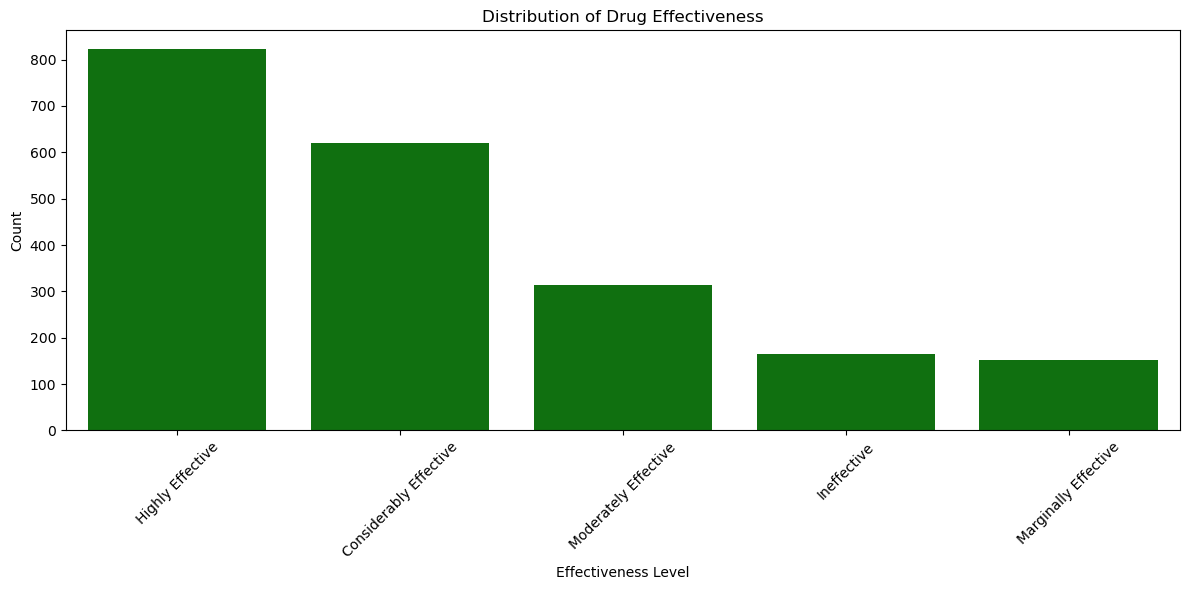

In [60]:
plt.figure(figsize=(12, 6))
effectiveness_counts = df_combined['effectiveness'].value_counts()
sns.barplot(x=effectiveness_counts.index, y=effectiveness_counts.values,color='green')
plt.xticks(rotation=45)
plt.title('Distribution of Drug Effectiveness')
plt.xlabel('Effectiveness Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

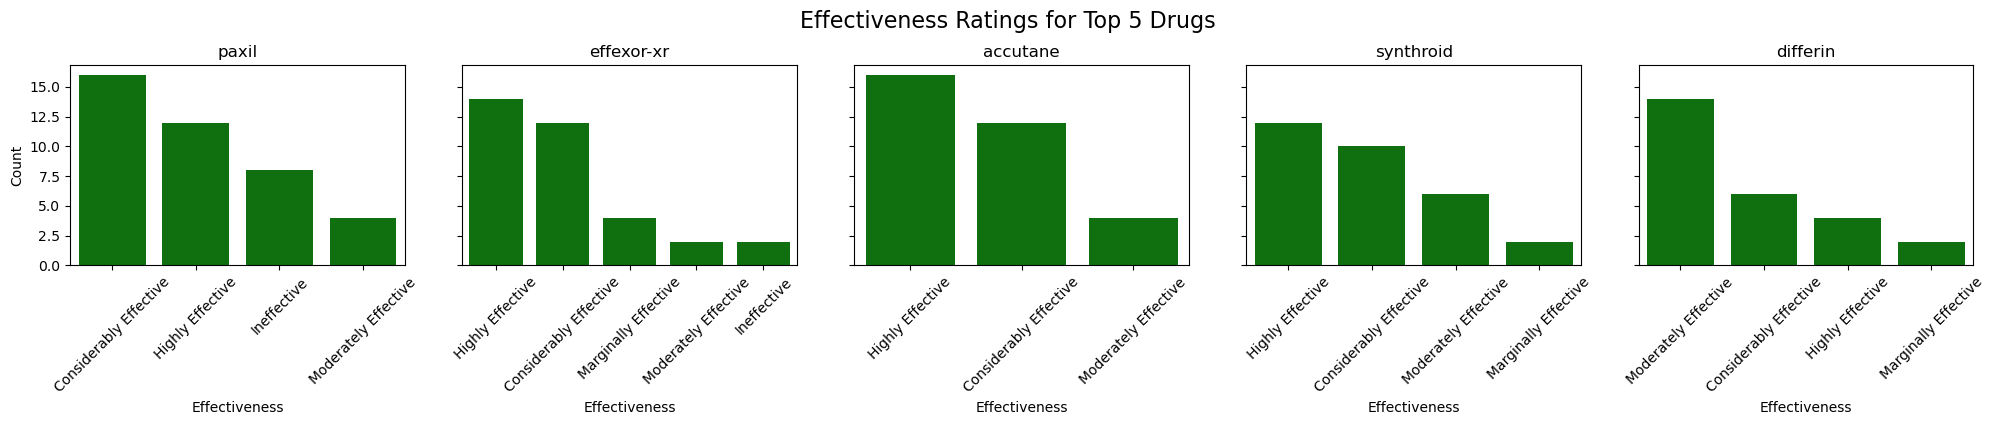

In [61]:
# Get top 5 drugs by frequency
top_5_drugs = df_combined['urlDrugName'].value_counts().head(5).index.tolist()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4), sharey=True)

# Plot effectiveness distribution for each top drug
for i, drug in enumerate(top_5_drugs):
    ax = axes[i]
    drug_data = df_combined[df_combined['urlDrugName'] == drug]
    effectiveness_counts = drug_data['effectiveness'].value_counts()

    sns.barplot(x=effectiveness_counts.index, y=effectiveness_counts.values,color='green', ax=ax)
    ax.set_title(drug)
    ax.set_xlabel('Effectiveness')
    ax.tick_params(axis='x', rotation=45)
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.set_ylabel('')

plt.tight_layout()
plt.suptitle('Effectiveness Ratings for Top 5 Drugs', fontsize=16, y=1.05)
plt.show()


In terms of effectiveness, the chart reveals higher records of effectiveness for drugs than ineffectiveness

**Side Effect**

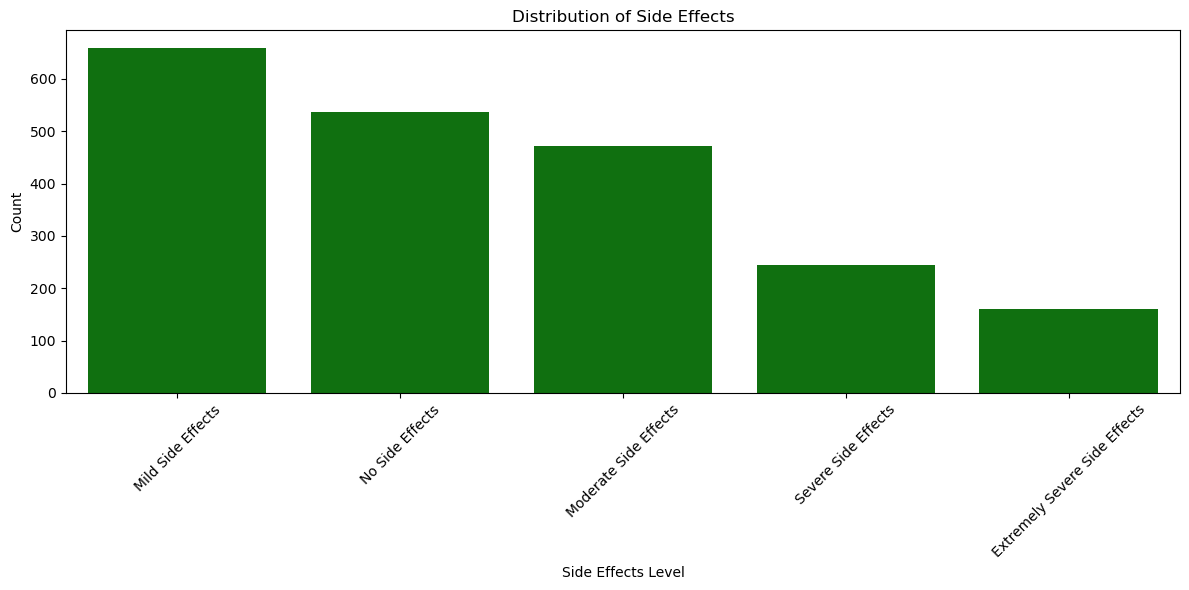

In [62]:
plt.figure(figsize=(12, 6))
side_effects_counts = df_combined['sideEffects'].value_counts()
sns.barplot(x=side_effects_counts.index, y=side_effects_counts.values, color='green')
plt.xticks(rotation=45)
plt.title('Distribution of Side Effects')
plt.xlabel('Side Effects Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In general, drugs had less records of extreme and severe side effects

**Conditions**

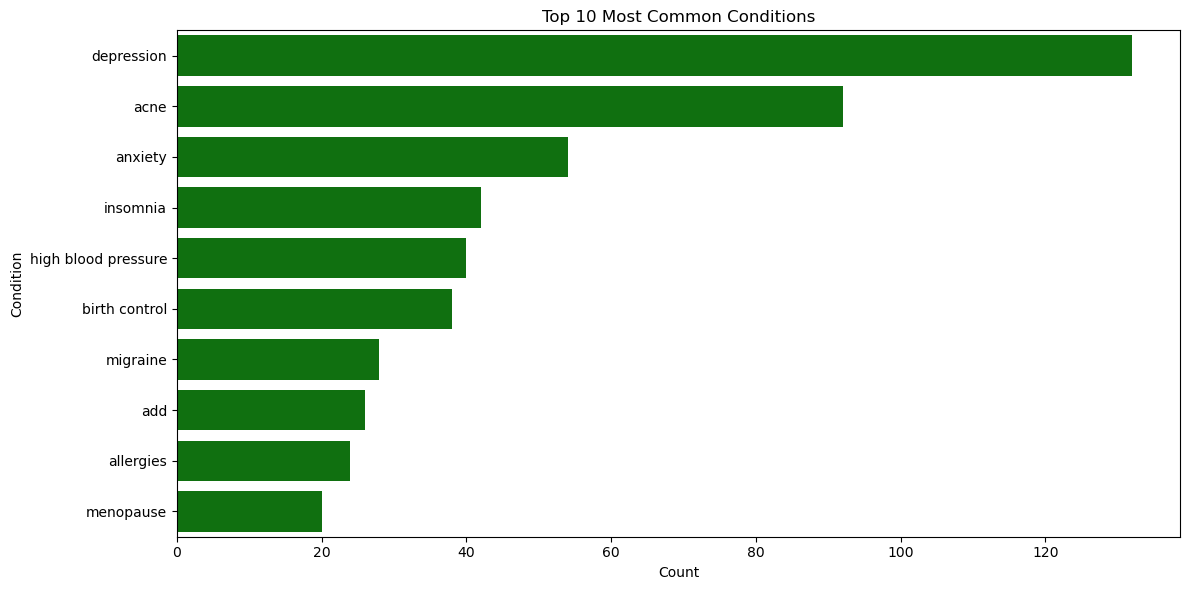

In [63]:
plt.figure(figsize=(12, 6))
condition_counts = df_combined['condition'].value_counts().head(10)
sns.barplot(x=condition_counts.values, y=condition_counts.index, color='green')
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.tight_layout()
plt.show()

## **Data Preprocessing**

**STEPS**

- **Text NLP Preprocessing**

- **POS Tagging**


The review Columns to Process are;

- benefitsReview

- sideEffectsReview

- commentsReview



In [64]:
# Combine Text review features together
df_combined['combined_review'] = df_combined['benefitsReview'].fillna('') +" " + \
                      df_combined['sideEffectsReview'].fillna('') + " " + \
                      df_combined['commentsReview'].fillna('')

##### **Text NLP Preprocessing**


- **Lowercasing :** To reduce the size of data/vocabulary, making the data consistent and reducing duplicate tokens.

- **Removing Special Characters & Digits :** To remove special symbols and numbers that usually don’t add sentiment value, leading to a Cleaner, focused text.

- **Removing Stopwords :** To remove frequently occuring words and retain meaningful words only

- **Lemmatization :** To Converts words to their base form reducing sparsity and improving model understanding.



**NOTE**: These preprocessing NLP steps ensures Clean & focused text which helps machine learning models to:

- Generalize better

- Focus on patterns that matter

- Reduce noise & overfitting

In [65]:
df_combined = df_combined[['id','urlDrugName','rating','effectiveness', 'sideEffects', 'condition','combined_review']]

In [66]:
# import  library for neat printing 
from pprint import pprint

# print example comments with special characters
pprint(df_combined.combined_review[1])

('Lamictal stabilized my serious mood swings. One minute I was clawing up the '
 'walls in pure mania, the next curled up in a fetal position on my bed '
 'contemplating suicdie. I am no longer at the whim of my moods and neither '
 "are those around me. I'm lucky that I started pharmaceuticals almost "
 'immediately after I was diagnosed a bipolar. Lamictal gives me amazing '
 'clarity to go about my day, honestly assess myself and form real '
 'relationships. Lamitcal lifted a fog, I guess you could call it. Now that '
 "I'm medicated I realize how cloudy my thought processes used to be. It's a "
 'wonderful feeling.\r'
 '\r\n'
 '\r'
 '\r\n'
 'Interestingly, I hardly dreamt before beginning Lamictal. I would dream (I '
 'mean dream in the sense of being able to imagine pictures and scenes while '
 'asleep, not REM) maybe once every two months. Now I dream every night. I '
 'found that the closer I take it to bedtime the more frequent and more '
 'intense my dreams. Drowsiness, a bit 

- The special characters like '\r\n' needs to be removed from data (denoise) as  it  does not add any value to sentiment analysis and can affect ML predictions.
- Word like 'Drowsiness', 'drowsiness' are both same word, to ensure that there are no duplicates in tokens, lowercasing needs to be applied.
- Stopwords like; `is, the, and, at, that` etc don't carry meaning, as such they need to be removed to allow for meaningful words only.
- Word like `amazing, medications, taking` needs to be converted to their base values as `amaze, medication, take` to improve model understanding of context.

In [ ]:
# Import nltk
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download essential NLTK resources programmatically (necessary models for task)
nltk_packages = [
    'punkt', # Tokenizer model
    'averaged_perceptron_tagger', # POS tagger
    'stopwords',
    'wordnet', # required for semantic analysis for lemmatization
    'maxent_ne_chunker',
    'words',
    'vader_lexicon',
    'omw-1.4' # WordNet OMW (open  modelling wordnet) corpus
]

for package in nltk_packages:
    nltk.download(package)

In [ ]:
# import relevant libraries
import re
from typing import List
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

# Add custom stopwords
stop_words.update(['none', 'day', 'nan', 'I', 'also', 'go'])

# Load the English Language model  with Lemmatization capabilities
lemanlp = WordNetLemmatizer()

# Function to clean and tokenize text
def clean_and_tokenize(text: str) -> List[str]:
    """
    Cleans and tokenizes input text for NLP tasks.

    Steps performed:
    1. Lowercasing the text.
    2. Removing special characters and digits using Regex.
    3. Tokenizing the cleaned text using NLTK word_tokenize.
    4. Removing punctuation or numeric tokens.
    5. Removing stopwords.
    6. Lemmatize remaining words (base/root form).

    Parameters:
        text (str): The input text data (raw string) to clean.

    Returns:
        List[str]: A list of clean and meaningful tokens.
    """
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Remove special chars & digits
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemanlp.lemmatize(word) for word in tokens]  # Lemmatization using WordNetLemmatizer
    return tokens

# Apply function to dataframe df_combined
df_combined['tokens1'] = df_combined['combined_review'].apply(clean_and_tokenize)

In [69]:
# print top 10 comments to see changes after preprocessing
pprint(df_combined.tokens1[1][:10])

['lamictal',
 'stabilized',
 'serious',
 'mood',
 'swing',
 'one',
 'minute',
 'clawing',
 'wall',
 'pure']


In [70]:
df_combined.head(3)

,id,urlDrugName,rating,effectiveness,sideEffects,condition,combined_review,tokens1
0,0,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"[antibiotic, may, destroyed, bacteria, causing..."
1,1,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"[lamictal, stabilized, serious, mood, swing, o..."
2,2,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"[initial, benefit, comparable, brand, name, ve..."


##### **Perform POS tagging**

Part-of-Speech (POS) tagging is used in NLP to identify the grammatical role of each word in a sentence, such as nouns, verbs, or adjectives. This understanding is crucial for interpreting sentence structure, resolving word ambiguities, and enabling more advanced tasks like syntactic parsing, named entity recognition, and lemmatization. POS tagging also improves the accuracy of language models and provides valuable features for tasks like sentiment analysis, machine translation, and question answering. By clarifying how words function in context, POS tagging helps machines better understand and process human language.

In [71]:
# library to optimise run time
from tqdm import tqdm

# Dictionary to store results
res = {}

# Loop through DataFrame rows
for i, row in tqdm(df_combined.iterrows(), total=len(df_combined)):
    myid = row['id']                      # Get ID
    tokens = row['tokens1']               # Tokens column (already tokenized)
    # Join tokens into a single text
    text = " ".join(tokens)

     # Tokenize again
    tokenized_text = nltk.word_tokenize(text)

    # POS Tagging
    tagged_tokens = nltk.pos_tag(tokenized_text)

    
    # Keep only Nouns & Adjectives
    filtered_tokens = [word for word, pos in tagged_tokens if pos.startswith('NN') or pos.startswith('JJ')]

    # Store both tokenized_text & filtered_tokens in dictionary
    res[myid] = {
        'tokenized_text': tokenized_text,
        'filtered_tokens': filtered_tokens
    }


  0%|          | 0/2072 [00:00<?, ?it/s]

100%|██████████| 2072/2072 [00:10<00:00, 191.34it/s]


In [72]:
# merge POS filtered words with main dataframe
All_result = pd.DataFrame(res).T
All_result = All_result.reset_index().rename(columns={'index': 'id'})
All_result = All_result[['id','filtered_tokens']]
result = All_result.merge(df_combined, how='left')

**Visualise Top words**

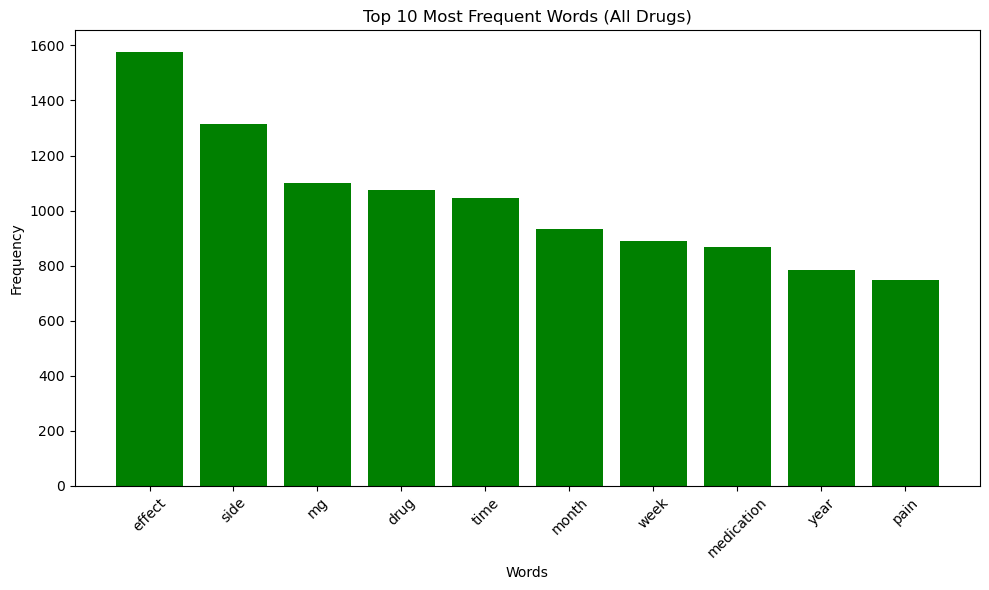

In [ ]:
from collections import Counter

# Visualize top N words in the whole dataset
def plot_top_words_overall(df, top_n=10):
    # Flatten all tokens from the 'filtered_tokens' column into one list
    all_words = [word for tokens in df['filtered_tokens'] for word in tokens]
    
    # Count word frequencies
    word_freq = Counter(all_words).most_common(top_n)

    # Split words and counts
    words, counts = zip(*word_freq)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='green')
    plt.title(f"Top {top_n} Most Frequent Words (All Drugs)")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_top_words_overall(result, top_n=10)


In [74]:
result['urlDrugName'].value_counts().head(10) # top 10 drugs

urlDrugName
paxil            40
effexor-xr       34
accutane         32
synthroid        30
differin         26
lipitor          26
effexor          26
wellbutrin-xl    24
citalopram       24
chantix          24
Name: count, dtype: int64

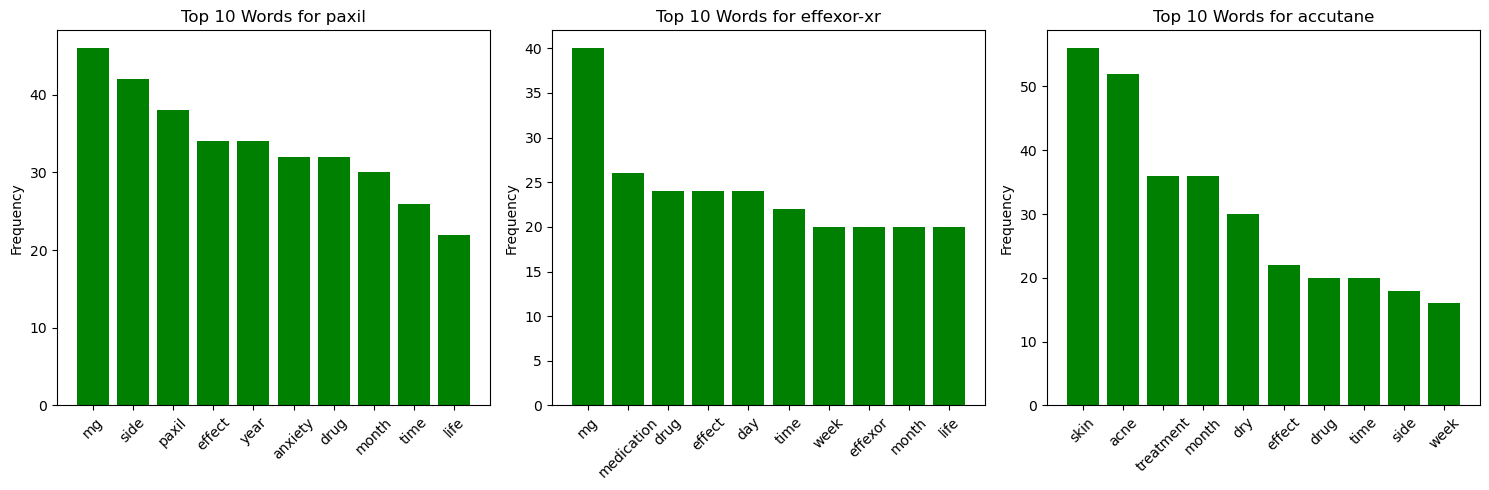

In [ ]:
# Visualize top N words for the top drugs
def plot_top_words(df, top_n=10, top_drugs=3):
    # Get the top `top_drugs` drugs by count of reviews 
    top_drugs_list = df['urlDrugName'].value_counts().nlargest(top_drugs).index.tolist()
    
    # Prepare the figure for multiple subplots
    plt.figure(figsize=(15, 5))
    
    for i, drug_name in enumerate(top_drugs_list):
        # Filter rows for that drug
        df_drug = df[df['urlDrugName'] == drug_name]
        
        # Flatten all tokens into one list
        all_words = [word for tokens in df_drug['filtered_tokens'] for word in tokens]
        
        # Count word frequency
        word_freq = Counter(all_words).most_common(top_n)
        
        # Split words & counts
        if word_freq:
            words, counts = zip(*word_freq)
        
            # Create a subplot for each drug
            plt.subplot(1, top_drugs, i+1)
            plt.bar(words, counts, color='green')
            plt.title(f"Top {top_n} Words for {drug_name}")
            plt.xticks(rotation=45)
            plt.ylabel("Frequency")
        else:
            print(f"No data available for drug: {drug_name}")
    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

# call function on data
plot_top_words(result, top_n=10, top_drugs=3)


## **Feature Engineering**

| **Feature**         | **Method**           | **Why?**                                           |
|--------------------|----------------------|------------------------------------------------|
| Bag of Words (BoW)  | Combine text columns | Simple word counts       |
| TF-IDF Vectors      | Combine text columns | Adds word frequency weighting                  |
| Drug Name           | label Encode         | Categorical                                    |
| Condition           | label Encode         | Categorical                                    |
| Side Effects Rating | Ordinal Encode       | 1-5 rating                                     |
| User Rating         | Scaled               | Important numeric                              |
| Sentiment Score     | VADER Sentiment      | Extra Feature                                  |




### Sentiment Analysis
VADER (Valence Aware Dictionary for Sentiment Reasoning ) Sentiment Scoring 

Sentiment analysis using the combined reviews of three columns - sideEffectReview, commentReview and benefitReview

##### Sentiment Analysis with POS tagging

In [76]:
# Convert each list to a long string
result['text_column_filtered'] = result['filtered_tokens'].apply(lambda x: ' '.join(x))
result['text_column_unfiltered'] = result['tokens1'].apply(lambda x: ' '.join(x))

In [77]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

sentiment_data = {}

for i, row in tqdm(result.iterrows(), total=len(result)):
    text = str(row['text_column_filtered'])
    myid = row['id']
    sentiment_data[myid] = sia.polarity_scores(text)

100%|██████████| 2072/2072 [00:02<00:00, 967.34it/s] 


In [78]:
# Combine Sentiment score and metadata
vaders_result = pd.DataFrame(sentiment_data).T
vaders_result = vaders_result.reset_index().rename(columns={'index': 'id'})
vaders_result = vaders_result.merge(result, how='left')

In [79]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

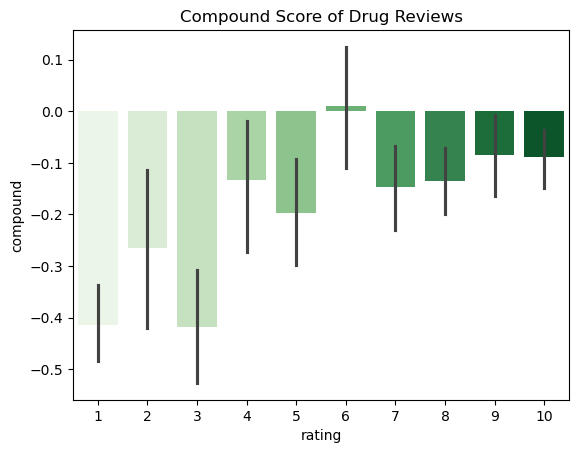

In [ ]:
# compute avg sentiment by rating
avg_sentiment = vaders_result.groupby('rating')['compound'].mean().reset_index()

# Create a color palette based on the compound score
colors = sns.color_palette("coolwarm", as_cmap=True)

# Plot results 
ax = sns.barplot(data=vaders_result, x='rating', y='compound', palette=sns.color_palette("Greens", n_colors=len(avg_sentiment)))
ax.set_title('Compound Score of Drug Reviews')
plt.show()

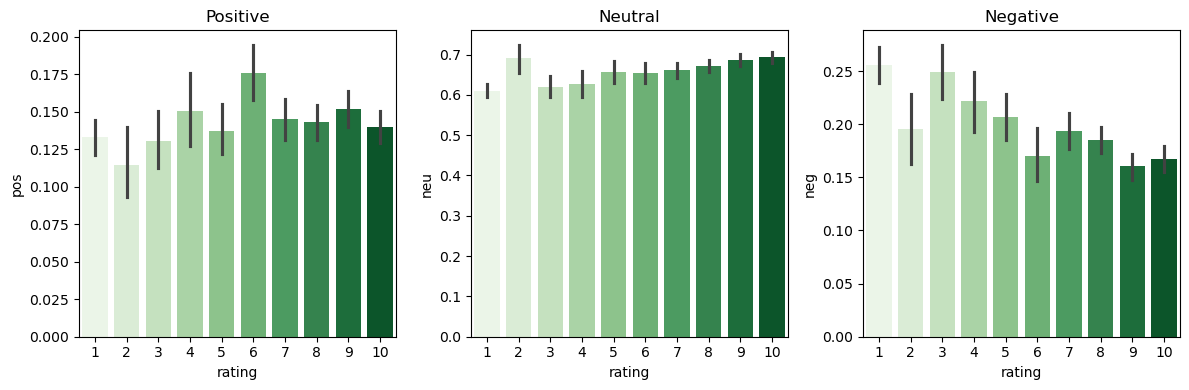

In [81]:
fig, axs= plt.subplots(1,3, figsize=(12,4))
sns.barplot(data=vaders_result, x='rating', y='pos',  ax=axs[0],palette=sns.color_palette("Greens", n_colors=len(avg_sentiment)))
sns.barplot(data=vaders_result, x='rating', y='neu', ax=axs[1], palette=sns.color_palette("Greens", n_colors=len(avg_sentiment)))
sns.barplot(data=vaders_result, x='rating', y='neg', ax=axs[2], palette=sns.color_palette("Greens", n_colors=len(avg_sentiment)))
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

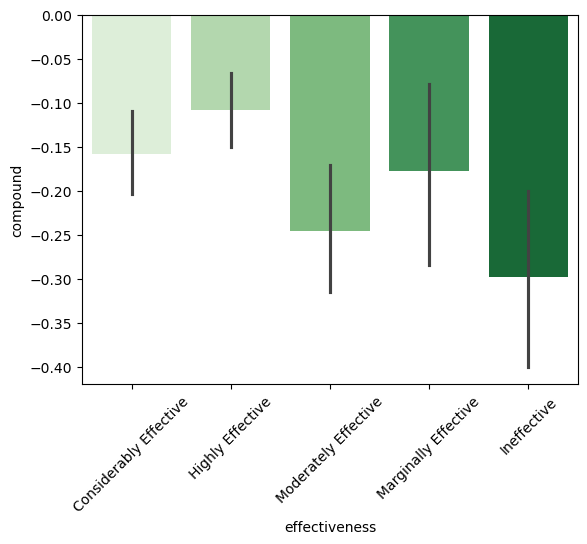

In [82]:
avg_sentiment = vaders_result.groupby('effectiveness')['compound'].mean().reset_index()
sns.barplot(data=vaders_result, x='effectiveness', y='compound',palette=sns.color_palette("Greens", n_colors=len(avg_sentiment)))
plt.xticks(rotation=45)
ax.set_title('Compound Score of Drug Reviews')
plt.show()

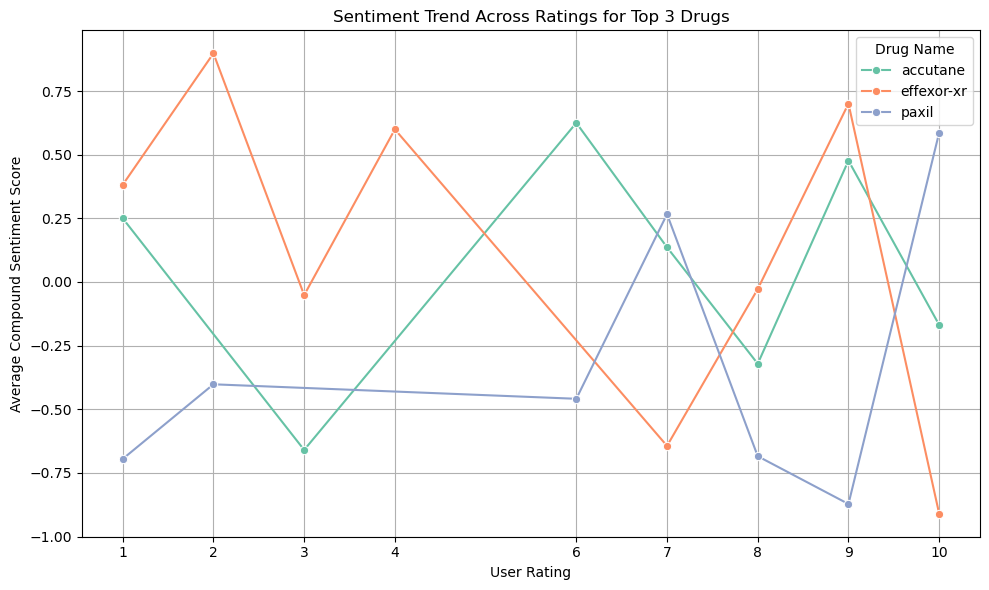

In [ ]:
# Get Top 3 most reviewed drugs
top_3_drugs = vaders_result['urlDrugName'].value_counts().nlargest(3).index.tolist()

# Filter Data for Top 3 Drugs
top3_df = vaders_result[vaders_result['urlDrugName'].isin(top_3_drugs)]

# Calculate Average Sentiment per Rating per Drug
avg_sentiment = top3_df.groupby(['urlDrugName', 'rating'])['compound'].mean().reset_index()

# Plot graph 
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_sentiment, x='rating', y='compound', hue='urlDrugName', marker='o', palette='Set2')

plt.title('Sentiment Trend Across Ratings for Top 3 Drugs')
plt.xlabel('User Rating')
plt.ylabel('Average Compound Sentiment Score')
plt.xticks(sorted(top3_df['rating'].unique()))
plt.legend(title='Drug Name')
plt.grid(True)
plt.tight_layout()
plt.show()


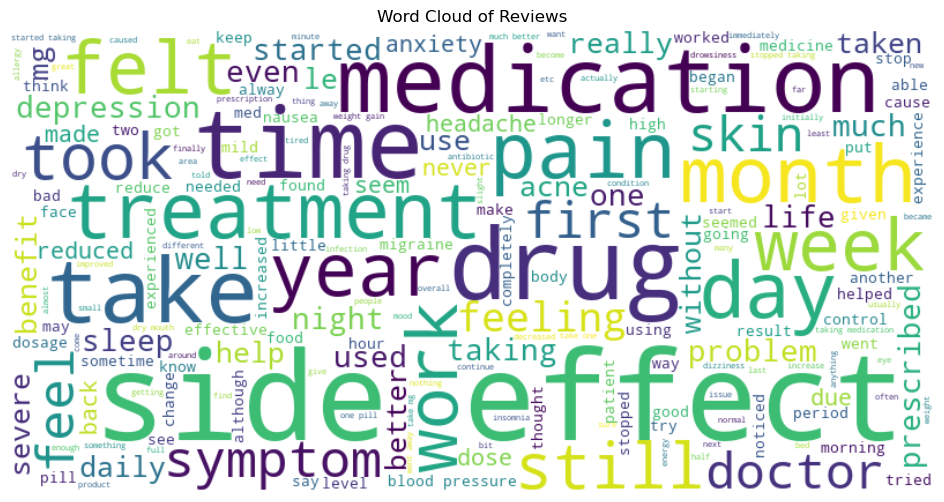

In [84]:
from wordcloud import WordCloud
plt.figure(figsize=(12, 6))
text = ' '.join(vaders_result['text_column_unfiltered'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

##### Sentiment Analysis without POS tagging 

In [85]:
sentiment_data_1 = {}

for i, row in tqdm(result.iterrows(), total=len(result)):
    text = str(row['text_column_unfiltered'])
    myid = row['id']
    sentiment_data_1[myid] = sia.polarity_scores(text)

100%|██████████| 2072/2072 [00:05<00:00, 388.48it/s]


In [86]:
# Combine Sentiment score and metadata
vaders_result1 = pd.DataFrame(sentiment_data_1).T
vaders_result1 = vaders_result1.reset_index().rename(columns={'index': 'id'})
vaders_result1 = vaders_result1.merge(result, how='left')

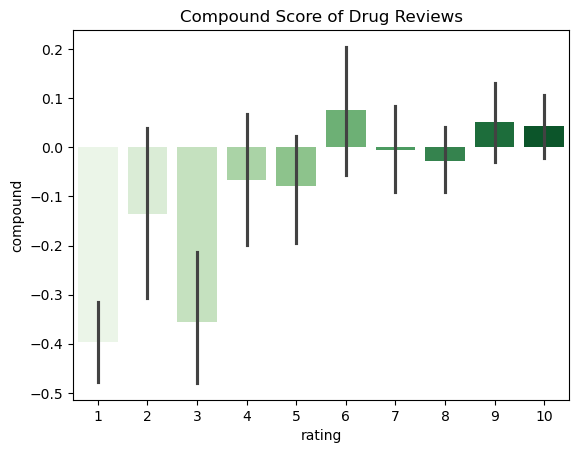

In [ ]:
# Assuming df_sentiment has 'rating' and 'compound' columns
avg_sentiment = vaders_result1.groupby('rating')['compound'].mean().reset_index()

# Create a color palette based on the compound score
colors = sns.color_palette("coolwarm", as_cmap=True)

# Plot 
ax = sns.barplot(data=vaders_result1, x='rating', y='compound', palette=sns.color_palette("Greens", n_colors=len(avg_sentiment)))
ax.set_title('Compound Score of Drug Reviews')
plt.show()

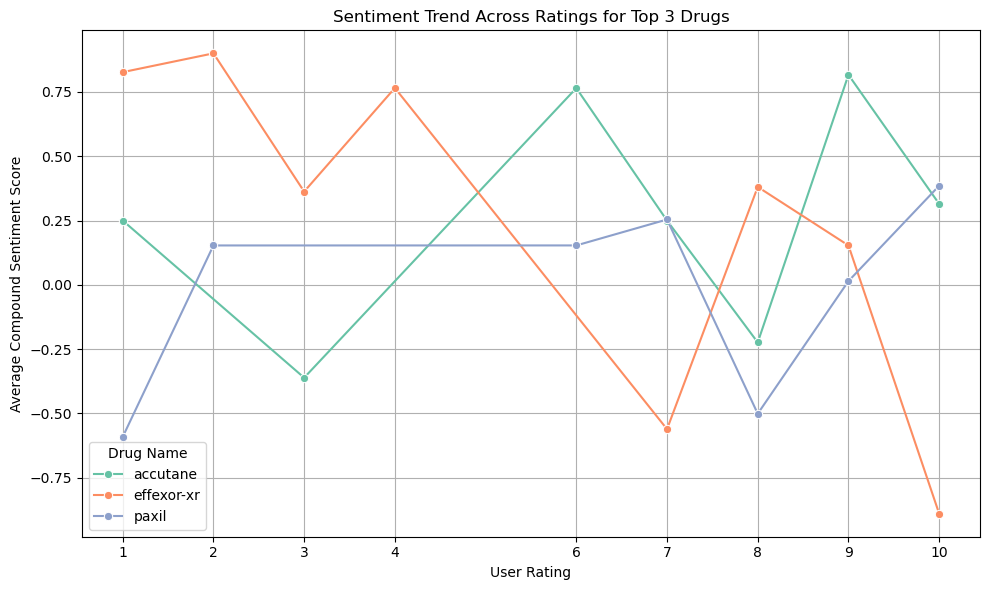

In [ ]:
# Get Top 3 most reviewed drugs
top_3_drugs = vaders_result1['urlDrugName'].value_counts().nlargest(3).index.tolist()

# Filter Data for Top 3 Drugs
top3_df = vaders_result1[vaders_result1['urlDrugName'].isin(top_3_drugs)]

# Calculate Average Sentiment per Rating per Drug
avg_sentiment = top3_df.groupby(['urlDrugName', 'rating'])['compound'].mean().reset_index()

# Plot 
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_sentiment, x='rating', y='compound', hue='urlDrugName', marker='o', palette='Set2')

plt.title('Sentiment Trend Across Ratings for Top 3 Drugs')
plt.xlabel('User Rating')
plt.ylabel('Average Compound Sentiment Score')
plt.xticks(sorted(top3_df['rating'].unique()))
plt.legend(title='Drug Name')
plt.grid(True)
plt.tight_layout()
plt.show()


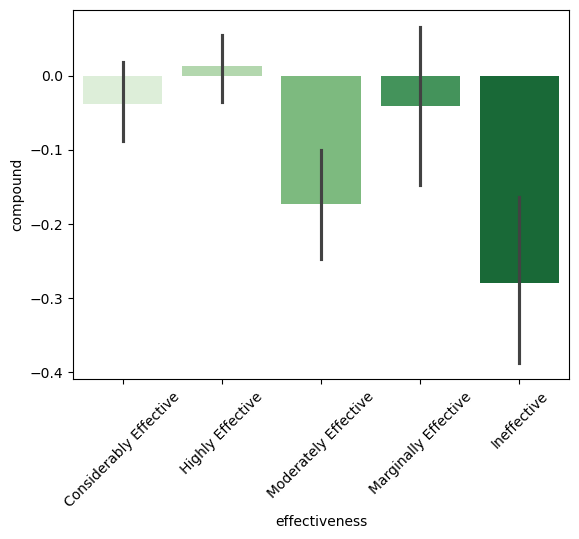

In [121]:
avg_sentiment = vaders_result1.groupby('effectiveness')['compound'].mean().reset_index()

sns.barplot(data=vaders_result1, x='effectiveness', y='compound',palette=sns.color_palette("Greens", n_colors=len(avg_sentiment)))
plt.xticks(rotation=45)
ax.set_title('Compound Score of Drug Reviews by Effectiveness')
plt.show()

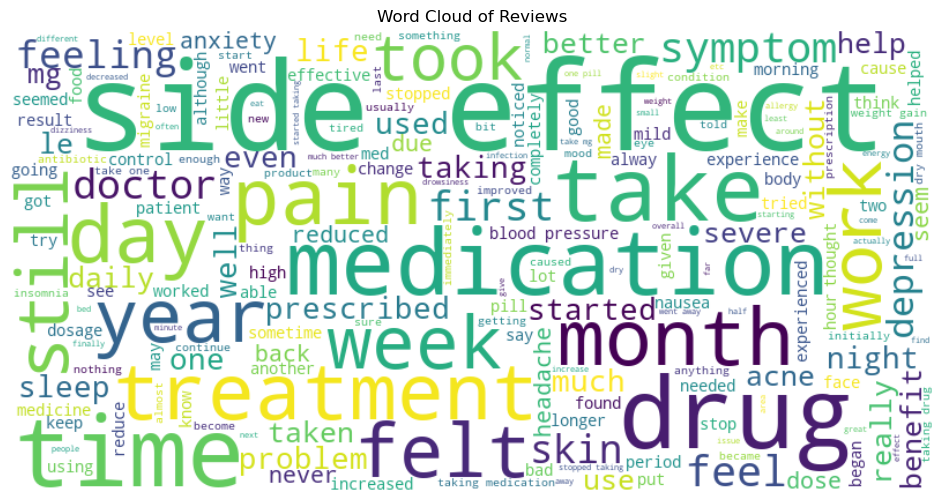

In [90]:
plt.figure(figsize=(12, 6))
text = ' '.join(vaders_result1['text_column_unfiltered'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

##### **Vectorization**

**Count Vectorization for Bag of Words**

In [ ]:
# import countVectorizer 
from sklearn.feature_extraction.text import CountVectorizer

# Create a Bag of Words representation using CountVectorizer
vectorizer_bow = CountVectorizer(stop_words='english')

# Fit and transform the text column
X_reviews_bow = vectorizer_bow.fit_transform(result['text_column_filtered'])

# Convert to DataFrame
X_df = pd.DataFrame(X_reviews_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())

# Add 'id' column from original dataframe
X_df = pd.concat([result[['id']].reset_index(drop=True), X_df], axis=1)

# Show final DataFrame
X_df.tail(5)

,id,abbreviation,abcess,abdomen,abdomin,abdominal,abilify,ability,ablate,ablation,...,zoloft,zombie,zomig,zone,zorvasc,zovirax,zoviraz,zyban,zyprexa,zyrtec
2067,2067,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2068,2068,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2069,2069,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2070,2070,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2071,2071,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Build Vocabulary** using TFIDF

In [ ]:
# TFIDF 
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer for TF-IDF vectorization
vectorizer = TfidfVectorizer(min_df=0.001)

# Fit and transform the filtered reviews column using TF-IDF 
X_reviews_tfidf = vectorizer.fit_transform(result['text_column_filtered'])

# Convert to DataFrame with TF-IDF values
X_df = pd.DataFrame(X_reviews_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Add 'id' column from the original dataframe
X_df = pd.concat([result[['id']].reset_index(drop=True), X_df], axis=1)

# Show the final DataFrame (last 5 rows)
X_df.tail(5)


,id,abdomen,abdominal,abilify,ability,ablation,able,absolute,absorption,abuse,...,zap,zetia,zocor,zoloft,zombie,zomig,zovirax,zyban,zyprexa,zyrtec
2067,2067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2068,2068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2069,2069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2070,2070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2071,2071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
result = vaders_result[['id', 'neg', 'neu', 'pos', 'compound','urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition']]
result.head()

,id,neg,neu,pos,compound,urlDrugName,rating,effectiveness,sideEffects,condition
0,0,0.320,0.680,0.000,-0.5719,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection
1,1,0.143,0.619,0.238,0.9136,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder
2,2,0.327,0.474,0.199,-0.9792,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder
3,3,0.093,0.687,0.220,0.5719,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety
4,4,0.051,0.949,0.000,-0.3818,accutane,10,Highly Effective,Mild Side Effects,nodular acne


##### **Encode other Categorical variables**

In [95]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

result = result.copy() # to remove warningd from output 

# Encode categorical variables
label_encoders = {}
categorical_columns = ['effectiveness', 'sideEffects', 'condition','urlDrugName']
for col in categorical_columns:
    le = LabelEncoder()
    result[col] = le.fit_transform(result[col])
    label_encoders[col] = le

result.head()



,id,neg,neu,pos,compound,urlDrugName,rating,effectiveness,sideEffects,condition
0,0,0.320,0.680,0.000,-0.5719,41,9,0,1,472
1,1,0.143,0.619,0.238,0.9136,138,9,1,1,89
2,2,0.327,0.474,0.199,-0.9792,75,4,4,4,89
3,3,0.093,0.687,0.220,0.5719,242,10,1,3,85
4,4,0.051,0.949,0.000,-0.3818,2,10,1,1,354


In [96]:
# Seperate target variable from explanatory variables 
y = result['effectiveness'] # assign effectivesness column to y as target variable
result_ex = result.drop(columns=['effectiveness']) # Drop the 'effectiveness' column from the DataFrame

*Feature Scaling for Independent variables*

This step in data Pre Processing / feature engineering is applied to independent variables or features of the data observations, to help normalize the data within a particular range of similar values. To ensure fair contribution of individual features in the drug review dataset we employ feature scaling to reduce bias towards features with larger values. Sometimes, it also helps in speeding up the calculations in an algorithm.

Standard scalar was used as our dataset has a normal distribution and standardscalar is best suited for normal distribution.

In [97]:
#Scale the labels for drugs names and condtion 
st = StandardScaler()
cols = ['urlDrugName', 'condition', 'rating', 'sideEffects','effectiveness']
result[cols] = st.fit_transform(result[cols])

In [98]:
result.head(5)

,id,neg,neu,pos,compound,urlDrugName,rating,effectiveness,sideEffects,condition
0,0,0.320,0.680,0.000,-0.5719,-1.299143,0.750393,-1.004638,-0.876769,1.423870
1,1,0.143,0.619,0.238,0.9136,-0.248199,0.750393,-0.277311,-0.876769,-0.955531
2,2,0.327,0.474,0.199,-0.9792,-0.930771,-0.930124,1.904669,1.698844,-0.955531
3,3,0.093,0.687,0.220,0.5719,0.878586,1.086497,-0.277311,0.840306,-0.980382
4,4,0.051,0.949,0.000,-0.3818,-1.721688,1.086497,-0.277311,-0.876769,0.690791


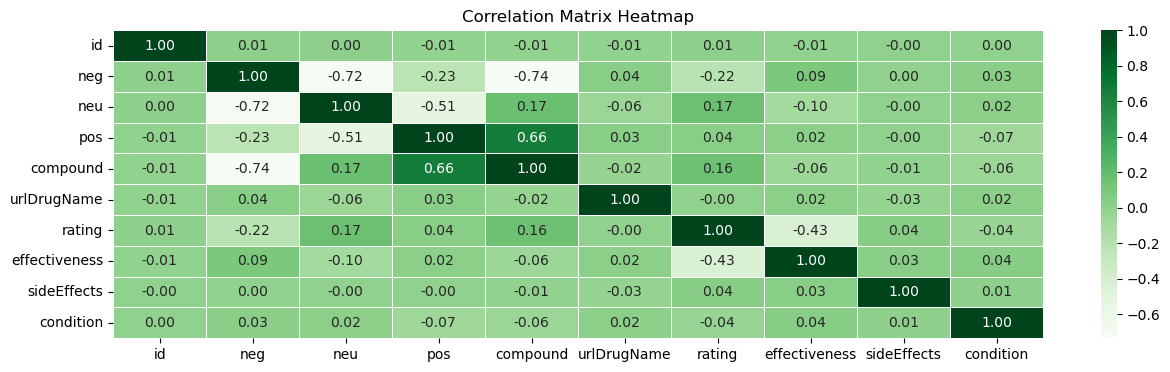

In [99]:
correlation_matrix = result.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(15, 4))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

## **ML Pipeline**
Combine Numerical + Encoded + Embeddings

Predict the Effectiveness of a drug 

`Build Models`

- *Models*
    - Random Forest

    - XGBoost

    - Logistic Regression (Baseline)

- *Train Models*
- *Make Prediction*

`Test Model Prediction`

`Evaluate Model Predictions`

Using metrics like 
- Accuracy 
- F1-score 

Combine Explanatory variable features together 

In [100]:
# Combine all features into one DataFrame
X_other = result[['urlDrugName', 'neg', 'neu','pos','compound', 'rating', 'condition', 'sideEffects']].values

Create a Function for Prediction 

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, log_loss
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.base import ClassifierMixin
from typing import Type
import numpy as np

# Initialize a DataFrame to store results
model_df = pd.DataFrame(columns=["Model", "CV Score", "Accuracy Score", "F1 Score", "Log Loss"])

def train_and_evaluate(model: Type[ClassifierMixin], 
                       X_train, y_train, 
                       X_val, y_val, 
                       X_test, y_test, 
                       cv_folds=10) -> None:
    """
    Trains the given model, performs cross-validation, 
    makes predictions on the validation and test sets, 
    and evaluates its performance using accuracy, F1 score, and log loss.
    
    Args:
        model (Type[ClassifierMixin]): A scikit-learn classifier model.
        X_train (array-like): Feature matrix for training.
        y_train (array-like): Target labels for training.
        X_val (array-like): Feature matrix for validation.
        y_val (array-like): Target labels for validation.
        X_test (array-like): Feature matrix for testing.
        y_test (array-like): Target labels for testing.
        cv_folds (int): Number of folds for cross-validation (default is 10).
    
    Returns:
        None: Prints and stores evaluation results in a DataFrame.
    """
    
    # Perform cross-validation on the training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
    avg_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_val_pred = model.predict(X_val)
    
    # Evaluate validation accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred, average='weighted')

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Evaluate test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    # Calculate Log Loss if applicable
    y_test_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    logloss = log_loss(y_test, y_test_prob) if y_test_prob is not None else 'N/A'

    # Print evaluation summary
    print("\n=== Model Evaluation ===")
    print(f"Model: {model.__class__.__name__}")
    print(f"Cross-Validation Accuracy: {avg_cv_score * 100:.2f}% ± {std_cv_score * 100:.2f}%")
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
    print(f"Validation F1 Score (Weighted): {f1_val * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Test F1 Score (Weighted): {f1_test * 100:.2f}%")
    print(f"Log Loss: {logloss}\n")

    print("=== Classification Report ===")
    print(classification_report(y_test, y_test_pred))

    # Store results in a dictionary
    model_results = {
        "Model": model.__class__.__name__,
        "CV Score": round(avg_cv_score * 100, 2),
        "Accuracy Score": round(test_accuracy * 100, 2),
        "F1 Score": round(f1_test * 100, 2),
        "Log Loss": logloss if logloss != 'N/A' else 'N/A'
    }

    # Append results to the global DataFrame
    global model_df
    model_df = pd.concat([model_df, pd.DataFrame([model_results])], ignore_index=True)



**Logistic Regression (Baseline Model) with TFIDF**

In [102]:
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack

X_tfidf = hstack([X_reviews_tfidf, X_other]) # Concatenate the TF-IDF features and the other features

# Split X_tfidf data into train (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# Logistic Regression for baseline model 
model = LogisticRegression(max_iter=1000)
train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test) # Call the train_and_evaluate function



=== Model Evaluation ===
Model: LogisticRegression
Cross-Validation Accuracy: 66.29% ± 2.18%
Validation Accuracy: 67.39%
Validation F1 Score (Weighted): 65.91%
Test Accuracy: 71.08%
Test F1 Score (Weighted): 70.04%
Log Loss: 0.8227480587737137

              precision    recall  f1-score   support

           0       0.67      0.60      0.64       134
           1       0.75      0.88      0.81       171
           2       0.67      0.85      0.75        34
           3       0.87      0.50      0.63        26
           4       0.62      0.42      0.50        50

    accuracy                           0.71       415
   macro avg       0.72      0.65      0.67       415
weighted avg       0.71      0.71      0.70       415



**Logistic Regression using Bag of Words (BoW)Matrix**

In [103]:
# Combine preprocessed X_reviews_bow and X_other 
X_bow = hstack([X_reviews_bow, X_other])  # explanatory variables combined

# Split the x_bow data into train (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_bow, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# Initialize Logistic Regression baseline model 
model = LogisticRegression(max_iter=1000)
train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test) # Call the train_and_evaluate function


=== Model Evaluation ===
Model: LogisticRegression
Cross-Validation Accuracy: 73.53% ± 4.32%
Validation Accuracy: 76.09%
Validation F1 Score (Weighted): 75.96%
Test Accuracy: 81.69%
Test F1 Score (Weighted): 81.56%
Log Loss: 0.644835558357186

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       134
           1       0.83      0.89      0.86       171
           2       0.97      0.88      0.92        34
           3       0.88      0.85      0.86        26
           4       0.74      0.64      0.69        50

    accuracy                           0.82       415
   macro avg       0.84      0.81      0.82       415
weighted avg       0.82      0.82      0.82       415



Our Baseline model performed best using bag of words over TGFID. Thus we will explore other models with Bag of Words Vectorized dataset

**RandomForestClassifier**

In [104]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test) # Call the train_and_evaluate function


=== Model Evaluation ===
Model: RandomForestClassifier
Cross-Validation Accuracy: 76.10% ± 3.17%
Validation Accuracy: 77.29%
Validation F1 Score (Weighted): 77.00%
Test Accuracy: 81.20%
Test F1 Score (Weighted): 81.02%
Log Loss: 0.5771959645841598

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       134
           1       0.80      0.91      0.85       171
           2       0.93      0.82      0.88        34
           3       1.00      0.73      0.84        26
           4       1.00      0.58      0.73        50

    accuracy                           0.81       415
   macro avg       0.89      0.77      0.81       415
weighted avg       0.83      0.81      0.81       415



**XGBoost Classifier**

In [105]:
import xgboost as xgb

# Suppress specific warnings (like user warnings) from XGBoost
warnings.filterwarnings("ignore", category=UserWarning, module='xgboost')

# Initialize the XGBoost Classifier
model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test) # Call the train_and_evaluate function


=== Model Evaluation ===
Model: XGBClassifier
Cross-Validation Accuracy: 79.16% ± 2.59%
Validation Accuracy: 77.78%
Validation F1 Score (Weighted): 77.71%
Test Accuracy: 81.20%
Test F1 Score (Weighted): 81.12%
Log Loss: 0.4785680191275963

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       134
           1       0.84      0.87      0.86       171
           2       0.86      0.94      0.90        34
           3       0.76      0.73      0.75        26
           4       0.66      0.66      0.66        50

    accuracy                           0.81       415
   macro avg       0.79      0.80      0.79       415
weighted avg       0.81      0.81      0.81       415



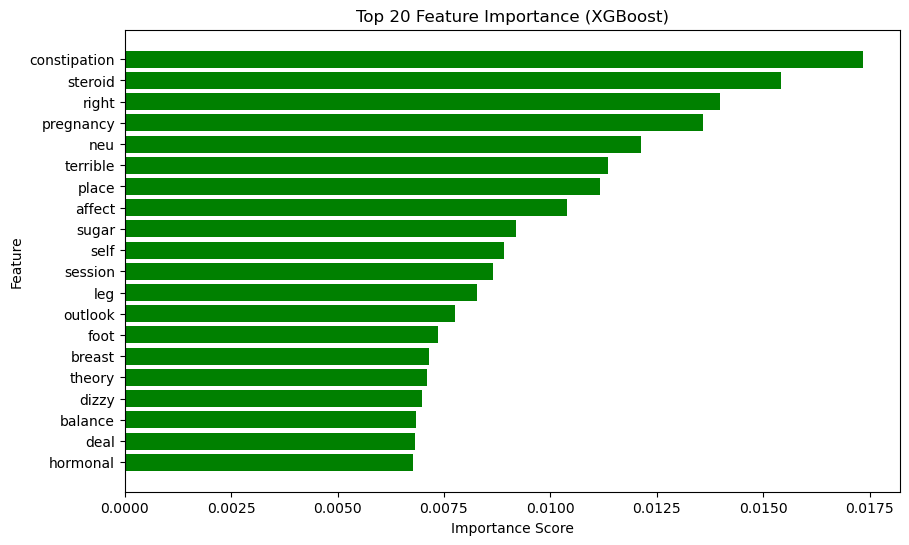

In [106]:

# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame for visualization
# Generate feature names for TF-IDF features (we assume X_reviews was created using TfidfVectorizer)
bow_feature_names = vectorizer_bow.get_feature_names_out()

# Combine feature names for bow and other features
feature_names = list(bow_feature_names) + ['urlDrugName', 'rating', 'condition', 'sideEffects','neg', 'neu','pos','compound']

# Ensure feature names match the number of features
assert len(feature_names) == len(feature_importance)

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 20 most important features
top_20_features = importance_df.head(20)

# Plot the top 10 feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='green')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importance (XGBoost)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [107]:
# Sort the DataFrame by 'Accuracy Score' and then 'CV Score', both in descending order
model_df.sort_values(by=['Accuracy Score', 'CV Score'], ascending=[False, False]).reset_index(drop=True)

,Model,CV Score,Accuracy Score,F1 Score,Log Loss
0,LogisticRegression,73.53,81.69,81.56,0.644836
1,XGBClassifier,79.16,81.20,81.12,0.478568
2,RandomForestClassifier,76.10,81.20,81.02,0.577196
3,LogisticRegression,66.29,71.08,70.04,0.822748


## Deep Learning 

In [108]:
result.head()

,id,neg,neu,pos,compound,urlDrugName,rating,effectiveness,sideEffects,condition
0,0,0.320,0.680,0.000,-0.5719,-1.299143,0.750393,-1.004638,-0.876769,1.423870
1,1,0.143,0.619,0.238,0.9136,-0.248199,0.750393,-0.277311,-0.876769,-0.955531
2,2,0.327,0.474,0.199,-0.9792,-0.930771,-0.930124,1.904669,1.698844,-0.955531
3,3,0.093,0.687,0.220,0.5719,0.878586,1.086497,-0.277311,0.840306,-0.980382
4,4,0.051,0.949,0.000,-0.3818,-1.721688,1.086497,-0.277311,-0.876769,0.690791


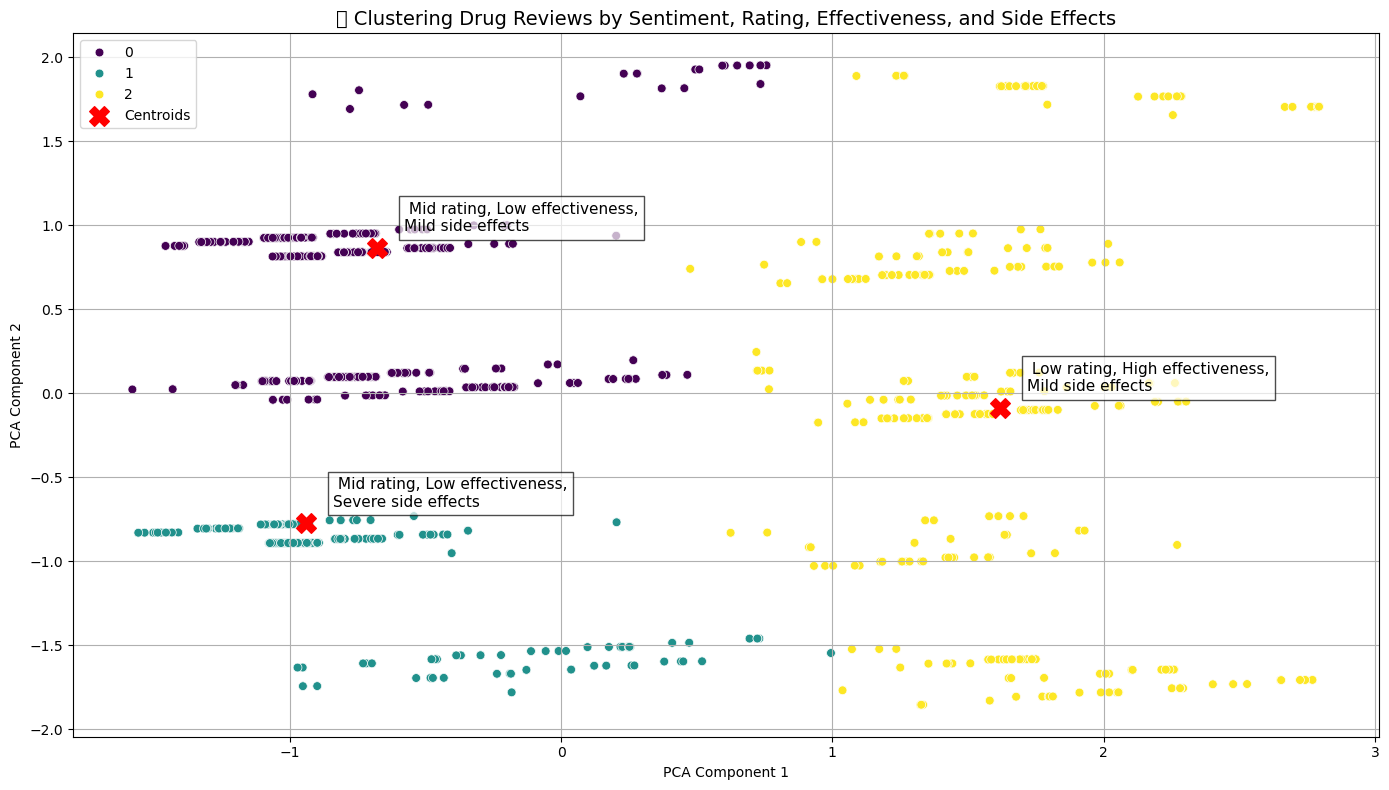


Cluster 0:
Avg Compound Sentiment: -0.12
Avg Rating: 0.40
Avg Effectiveness: -0.64
Avg Side Effects Severity: -0.64

Cluster 1:
Avg Compound Sentiment: -0.14
Avg Rating: 0.59
Avg Effectiveness: -0.52
Avg Side Effects Severity: 1.00

Cluster 2:
Avg Compound Sentiment: -0.25
Avg Rating: -1.04
Avg Effectiveness: 1.29
Avg Side Effects Severity: -0.03


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore") # removes filterwarnings from code output

# Features relevant to hypothesis
clustering_features = result[['compound', 'rating', 'effectiveness', 'sideEffects']].copy()

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
result['cluster'] = kmeans.fit_predict(clustering_features)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_features)
result['pca1'] = pca_result[:, 0]
result['pca2'] = pca_result[:, 1]

# Computed PCA result and clusters
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = result['cluster']

# Get cluster centroids (reduced to 2D)
centroids_2d = PCA(n_components=2).fit_transform(kmeans.cluster_centers_)

# Plot with annotations
plt.figure(figsize=(14, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=40)

# Plot centroids
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], 
            marker='X', s=200, c='red', label='Centroids')

# Add custom annotations based on your earlier cluster analysis
annotations = {
    0: " Mid rating, Low effectiveness,\nMild side effects",
    1: " Mid rating, Low effectiveness,\nSevere side effects",
    2: " Low rating, High effectiveness,\nMild side effects"
}

for cluster_id, label in annotations.items():
    x, y = centroids_2d[cluster_id]
    plt.text(x + 0.1, y + 0.1, label, fontsize=11, bbox=dict(facecolor='white', alpha=0.7))

plt.title('🔍 Clustering Drug Reviews by Sentiment, Rating, Effectiveness, and Side Effects', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# print cluster results 
for cluster in sorted(result['cluster'].unique()):
    cluster_data = result[result['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Avg Compound Sentiment: {cluster_data['compound'].mean():.2f}")
    print(f"Avg Rating: {cluster_data['rating'].mean():.2f}")
    print(f"Avg Effectiveness: {cluster_data['effectiveness'].mean():.2f}")
    print(f"Avg Side Effects Severity: {cluster_data['sideEffects'].mean():.2f}")


The hypothesis that “positive sentiment will correlate with high effectiveness ratings, while negative sentiments will align with lower ratings and more severe side effects” is only partially supported by the clustering results. While Cluster 0 aligns with the hypothesis—showing mild negativity alongside low effectiveness and mild side effects—Cluster 2 contradicts it by displaying high effectiveness but negative sentiment and low ratings. Cluster 1 adds further ambiguity, with an average rating, low effectiveness, and very severe side effects, making the overall sentiment-effectiveness correlation inconsistent across clusters.

## Conclusion 

The Logistic Regression with Bag-of-Words (BoW) model performed the best in terms of accuracy and F1 score, while XGBoost showed superior calibration and generalization capabilities, making it ideal for capturing complex feature interactions. Logistic Regression with TF-IDF underperformed due to its inability to capture nuanced patterns. Random Forest had solid performance but was more prone to overfitting.

## Recommendations

Use Logistic Regression with BoW for deployment, with XGBoost as a secondary model for probabilistic predictions. Avoid TF-IDF with Logistic Regression unless enhanced by advanced techniques. Explore an ensemble approach combining XGBoost and Random Forest, and consider unsupervised learning, like K-Means, to uncover deeper insights. Further research should explore word embeddings and longitudinal data to improve predictions.

Furthermore, when considering to deploy model in the future (after finalizing the model), **Pickle** will be suitable for efficient serialization and ease of deployment in real-world applications. Additionally, building a **recommendation system** based on the model predictions could provide valuable personalized insights, such as suggesting drugs to users based on their conditions and side effects, enhancing the overall utility of the system.

## References

- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (n.d.). 3.2. Feature extraction — scikit-learn 1.4.1 documentation. scikit-learn. https://scikit-learn.org/stable/modules/feature_extraction.html

- Python Geeks. (n.d.). XGBoost Introduction. https://pythongeeks.org/xgboost-introduction/

- Russell, S., & Norvig, P. (2021). Artificial intelligence: A modern approach (4th ed.). Prentice Hall

- Analytics Vidhya. (2021, May 17). Natural Language Processing: Step-by-step guide. https://www.analyticsvidhya.com/blog/2021/05/natural-language-processing-step-by-step-guide/